# This notebook serves as a demo of how to get the CO2 scattering intensity assuming a unifrom sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

import sys
sys.path.append("..")

from ContrastEstimation import util, IntensityEstimation

## Define the sample molecule

In [2]:
my_molecule = util.get_molecule_from_pdb("../pdb_files/co2.pdb")

# Show the source code of how I have defined a molecule for calculation.
util.show_formated_molecule_structure(my_molecule)

[
[ 'C', np.array([-1.194,0.58,0.312]),],
[ 'O', np.array([0.122,0.548,0.312]),],
[ 'O', np.array([-2.51,0.611,0.312]),],
],


## Estimate the scattering intensity

In [20]:
density_g_cm3_list = [0.6,]  # g / cm3  # Partial density for each kind of molecule
q_in_A = 0.12  # A

# Define sample thickness
N_sample = 100
sample_thickness_list = np.linspace(10, 1e4, N_sample) * 1e-6

# Define detector distance
N_det = 100
distance_list = np.linspace(1, 10, N_det)

# Define detector pixel size
pixel_size = 50e-6  # 50 um

# Define the incident photon count
incident_photon_count = 1e8
incident_photon_energy_keV = 9.5 # keV

# Scattering intensity map
photon_count_per_pixel = np.zeros((N_sample, N_det))
for x in range(N_sample):
    for y in range(N_det):
        photon_count_per_pixel[x,y] = IntensityEstimation.get_scatter_intensity_with_a_unifrom_sample(
            molecule_structure_list=[my_molecule, ],
            density_g_cm3_list=density_g_cm3_list,
            sample_thickness=sample_thickness_list[x],
            pixel_size=pixel_size,
            detector_distance = distance_list[y],
            incident_photon_count = incident_photon_count,
            q_detector = q_in_A,
            photon_energy_keV = incident_photon_energy_keV)
        

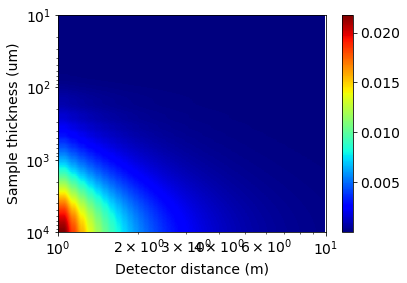

In [34]:
plt.imshow(np.flipud(photon_count_per_pixel),
           extent=[1, 10, 1e4, 10],
           origin="lower",
           aspect='auto',
           cmap='jet')
plt.xlabel("Detector distance (m)")
plt.ylabel("Sample thickness (um)")
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.show()